In [150]:
import seaborn as sns
import pandas as pd

In [146]:
dataset_path = "./estimated_crimes_1979_2022.csv"
data = pd.read_csv(dataset_path)
data.head()
data = data.drop(["state_abbr","state_name","caveats"],axis=1)


In [147]:
aggregation_functions = {}
for col_name in data.columns:
    if col_name == "year":
        aggregation_functions[col_name] = 'equals'
    if col_name == "population" :
        aggregation_functions[col_name] = 'sum'
    else:
        aggregation_functions[col_name] = 'mean'
    


44


NameError: name 'plt' is not defined

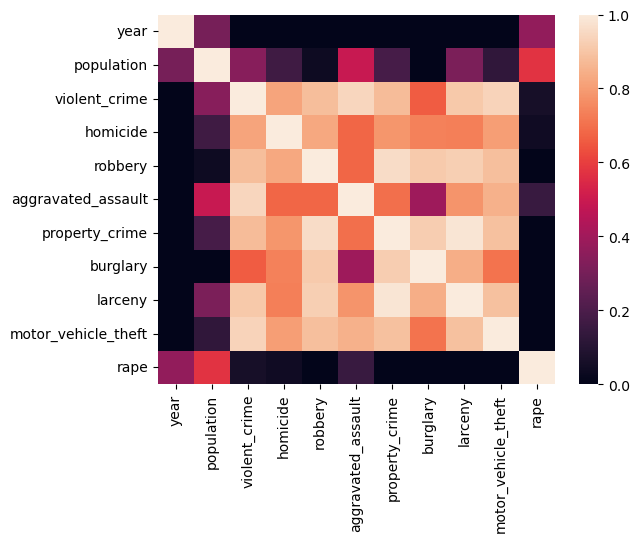

In [151]:
# aggregation_functions = {'population': 'sum','violent_crime':'avg','homicide':'sum','rape_legacy':'sum',}
modified_data = data.groupby(data['year']).aggregate(aggregation_functions)
modified_data['rape_legacy'].fillna(0, inplace=True)
modified_data['rape_revised'].fillna(0, inplace=True)

modified_data['rape'] = modified_data['rape_legacy']+ modified_data['rape_revised']
modified_data = modified_data.drop(["rape_legacy","rape_revised"],axis=1)

print(len(modified_data))

corr = modified_data.corr()
ax = sns.heatmap(corr , vmin=0, vmax=1)
plt.show() 

# df_expanded = modified_data.loc[modified_data.index.repeat(12)].reset_index(drop=True)
# print(len(df_expanded))


In [138]:
df_expanded["month"] = (df_expanded.index % 12) + 1
df_expanded["violent_crime"]  = df_expanded["violent_crime"] / 12
df_expanded["homicide"]  = df_expanded["homicide"] / 12
df_expanded["robbery"]  = df_expanded["robbery"] / 12
df_expanded["aggravated_assault"]  = df_expanded["aggravated_assault"] / 12
df_expanded["property_crime"]  = df_expanded["property_crime"] / 12
df_expanded["burglary"]  = df_expanded["burglary"] / 12
df_expanded["larceny"]  = df_expanded["larceny"] / 12
df_expanded["motor_vehicle_theft"]  = df_expanded["motor_vehicle_theft"] / 12
df_expanded["rape"]  = df_expanded["rape"] / 12
print(df_expanded[:24])
df_expanded = df_expanded.astype(int)
print(df_expanded[:24])


      year  population  violent_crime  homicide     robbery  \
0   1979.0   440196000     322.607238  5.731303  128.365251   
1   1979.0   440196000     322.607238  5.731303  128.365251   
2   1979.0   440196000     322.607238  5.731303  128.365251   
3   1979.0   440196000     322.607238  5.731303  128.365251   
4   1979.0   440196000     322.607238  5.731303  128.365251   
5   1979.0   440196000     322.607238  5.731303  128.365251   
6   1979.0   440196000     322.607238  5.731303  128.365251   
7   1979.0   440196000     322.607238  5.731303  128.365251   
8   1979.0   440196000     322.607238  5.731303  128.365251   
9   1979.0   440196000     322.607238  5.731303  128.365251   
10  1979.0   440196000     322.607238  5.731303  128.365251   
11  1979.0   440196000     322.607238  5.731303  128.365251   
12  1980.0   450738528     359.050881  6.154380  151.102564   
13  1980.0   450738528     359.050881  6.154380  151.102564   
14  1980.0   450738528     359.050881  6.154380  151.10

In [143]:
df_expanded.to_csv('monthly_crime.csv', index=False)
